# imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\mmnm2\Desktop\PROJECT 45 END\water.csv")


In [3]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [4]:
df.head ()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

# Exploratory data analysis

In [6]:
df.size                 

32760

In [7]:
df.shape

(3276, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [11]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

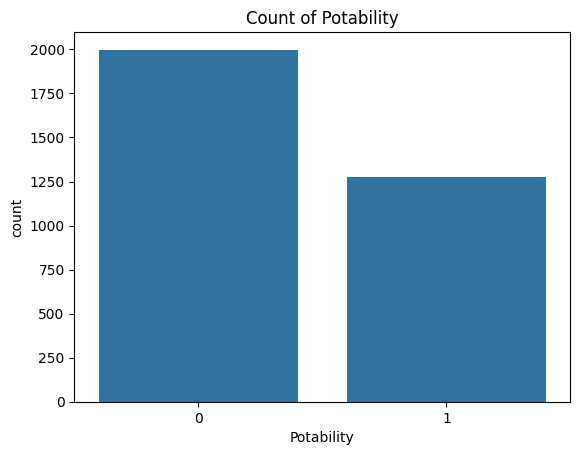

In [12]:
sns.countplot(x='Potability', data=df)
plt.title('Count of Potability')
plt.show()

In [13]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

<Axes: >

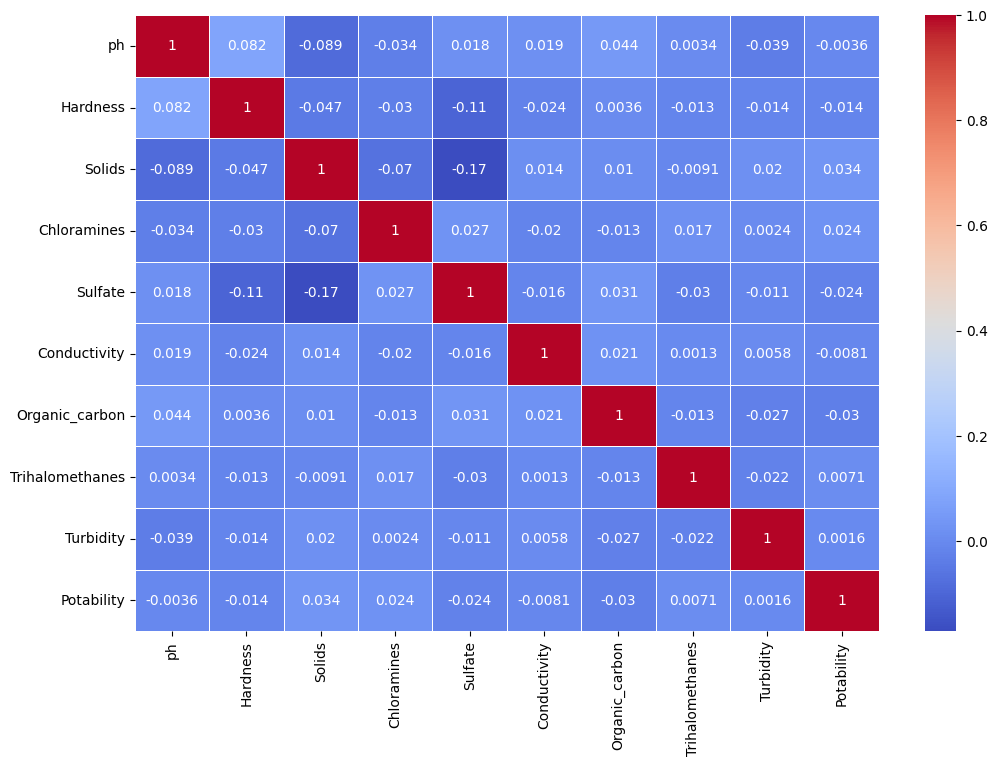

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

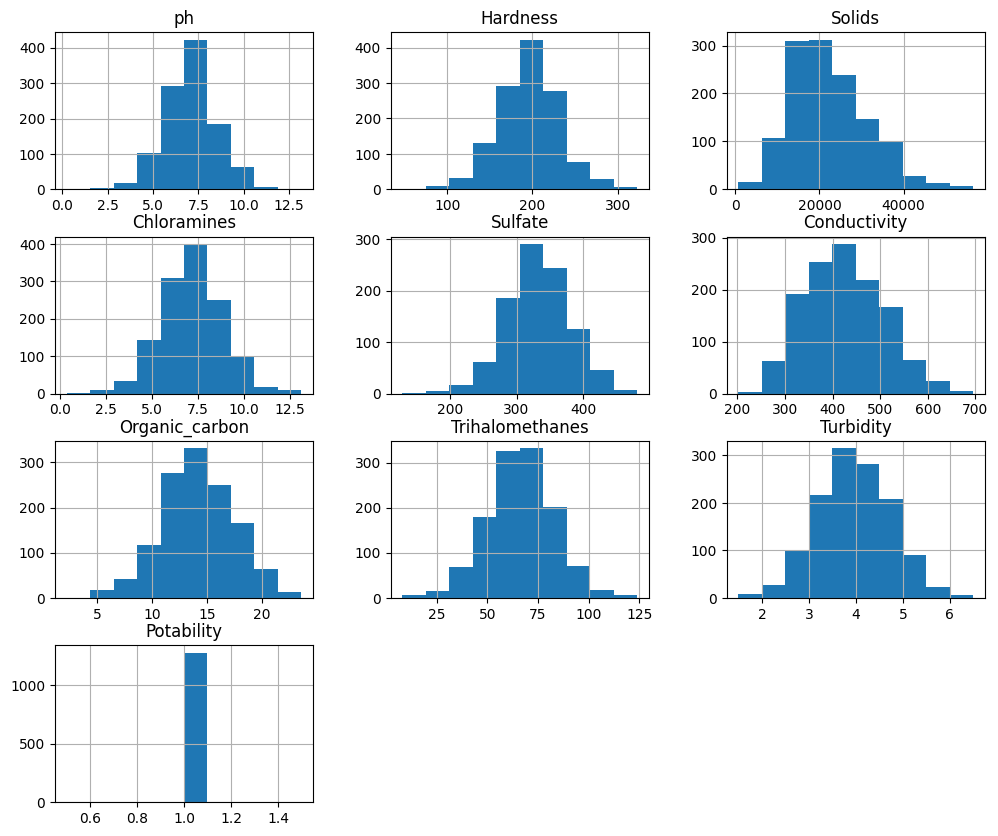

In [15]:
Potability_data = df[df['Potability'] == 1]
Potability_data.hist(figsize=(12, 10))
plt.show()

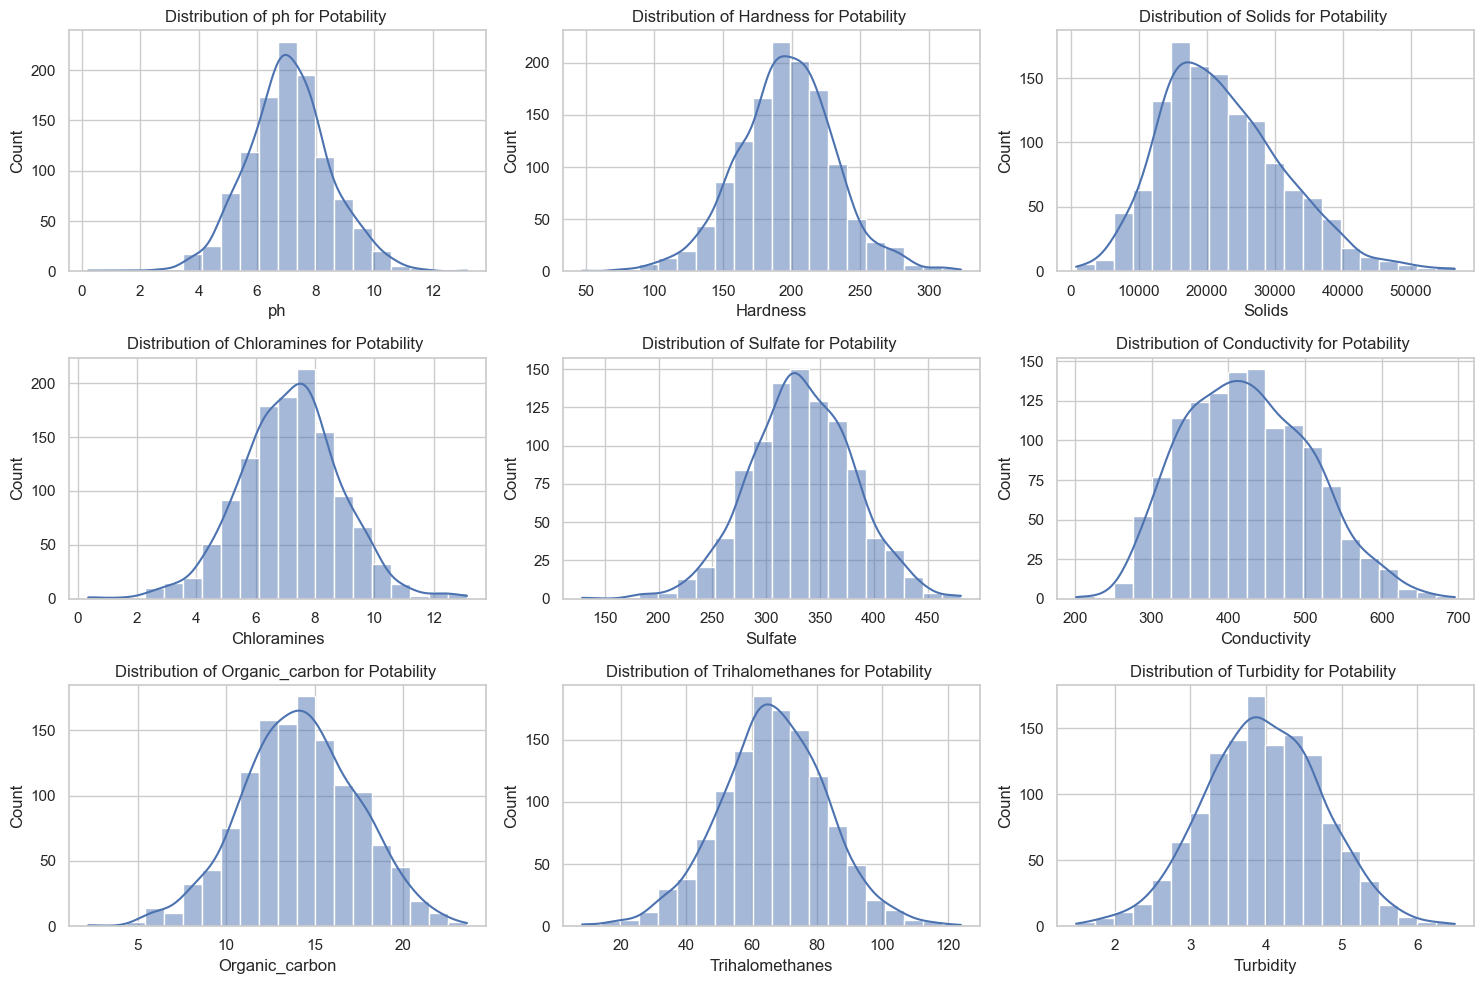

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

Potability_data = df[df['Potability'] == 1]

for i, column in enumerate(Potability_data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(Potability_data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column} for Potability ')

plt.tight_layout()
plt.show()

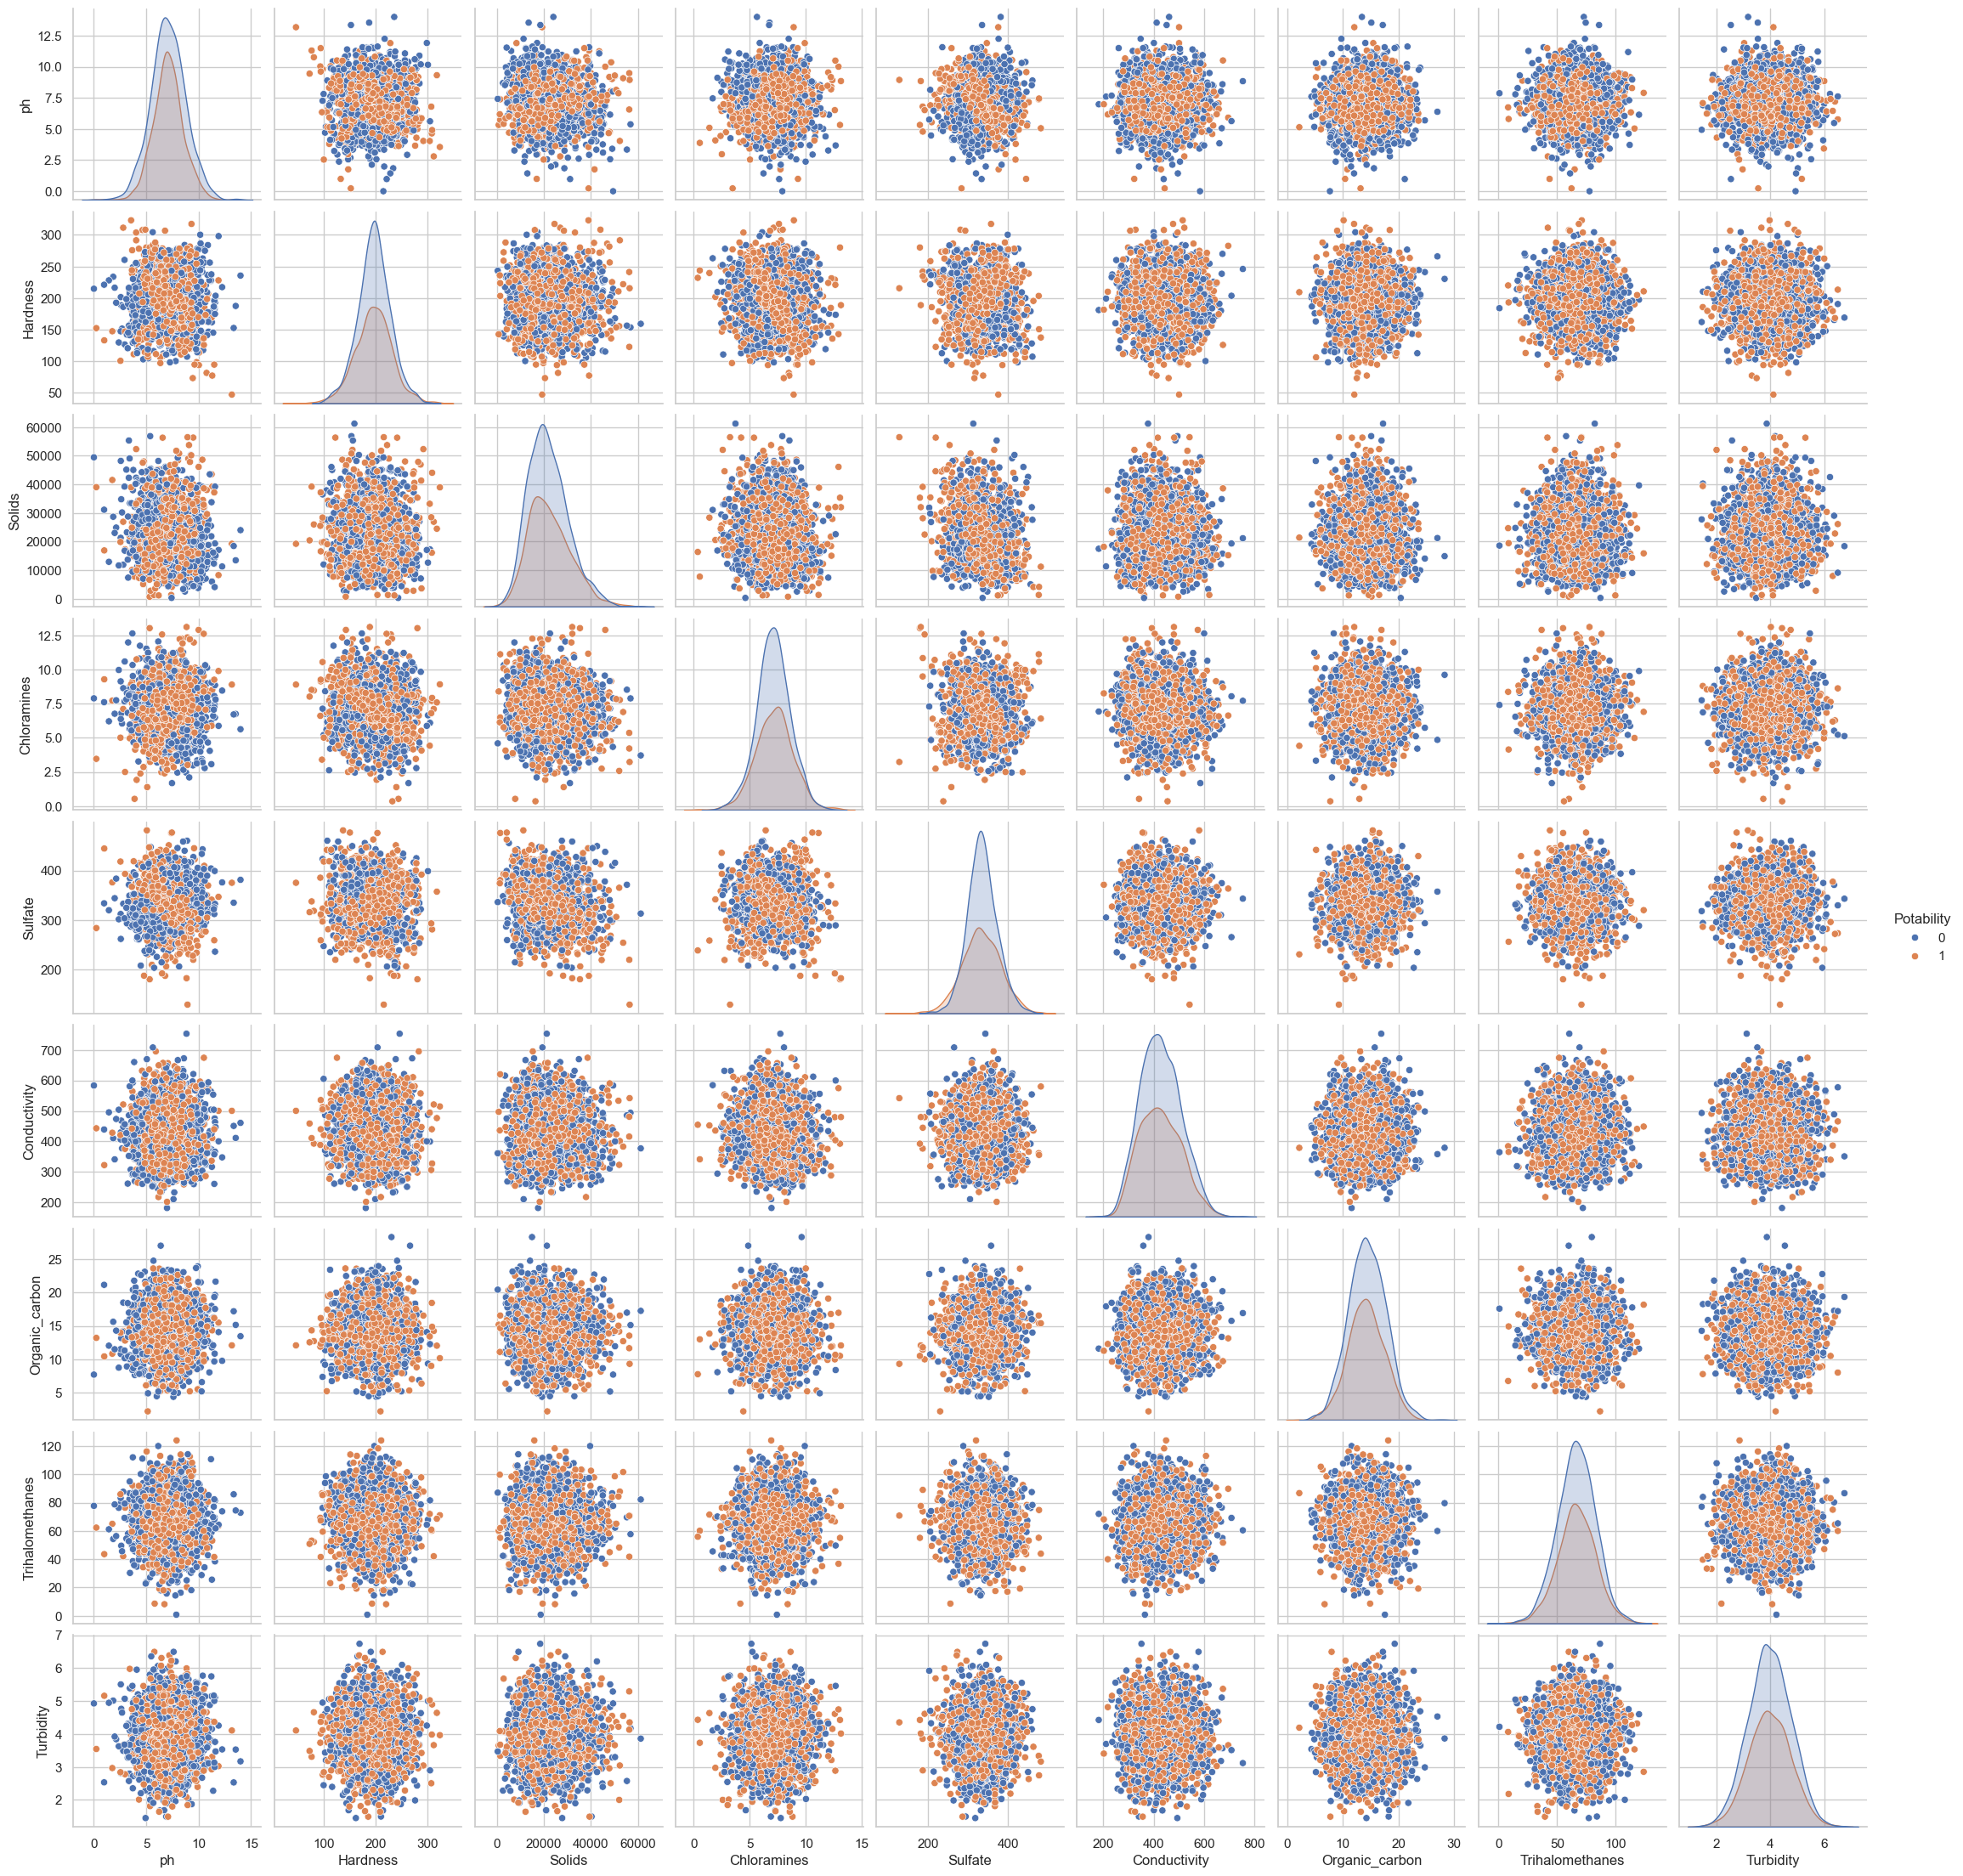

In [17]:
sns.pairplot(df, hue="Potability")

## Q - What is the relationship between Chloramines and Conductivity ?

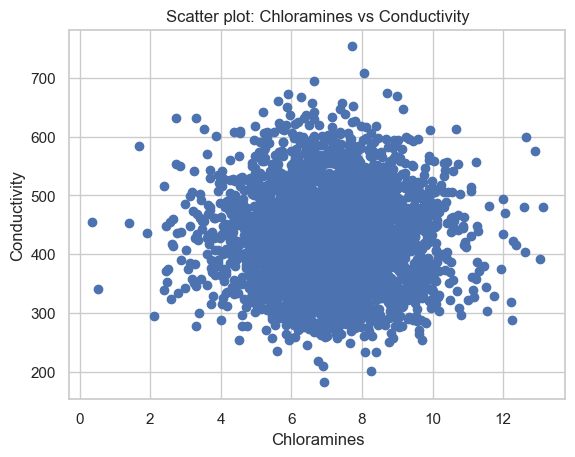

In [18]:
plt.scatter(df['Chloramines'], df['Conductivity'])
plt.xlabel('Chloramines')
plt.ylabel('Conductivity')
plt.title('Scatter plot: Chloramines vs Conductivity')
plt.show()

***Relation between the conductivity and the chloramines are concentrated between 4 - 10 for the chloramines and 300 - 600 for the conductivitu***

## Q - How does the concentration of solids differ between potable and non-potable water samples?



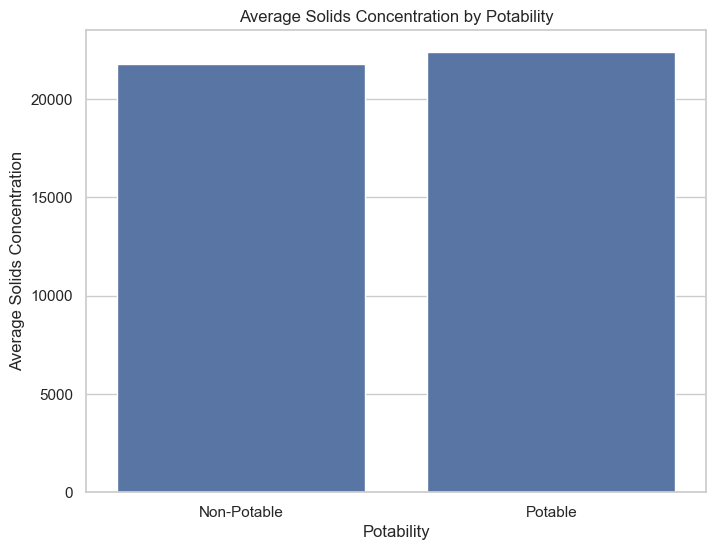

In [19]:
# Bar Plot for Average Solids Concentration by Potability
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Potability', y='Solids', ci=None)
plt.title('Average Solids Concentration by Potability')
plt.xlabel('Potability')
plt.ylabel('Average Solids Concentration')
plt.xticks(ticks=[0, 1], labels=['Non-Potable', 'Potable'])
plt.show()

***The bar plot shows that the average concentration of solids in non-potable water samples is less compared to potable water samples, indicating a potential relationship between higher solids concentration and water non-potability.***

# Preproccessing the dataset (cleaning)

In [20]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [21]:
columns_to_replace = ['ph', 'Sulfate', 'Trihalomethanes']
means = df[columns_to_replace].mean()
df[columns_to_replace] = df[columns_to_replace].replace(0, means)

In [22]:
df['ph'].fillna(df['ph'].mean(), inplace = True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace = True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace = True)

In [23]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [24]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.083337   196.369496  22014.092526     7.122277   333.775777   
std       1.464737    32.879761   8768.570828     1.583085    36.142612   
min       0.227499    47.432000    320.942611     0.352000   129.000000   
25%       6.279317   176.850538  15666.690297     6.127421   317.094638   
50%       7.083337   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [25]:
df.duplicated().sum()

0

In [26]:
# Handle the balanced in the dataset

X = df.drop('Potability', axis=1)
y = df['Potability']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

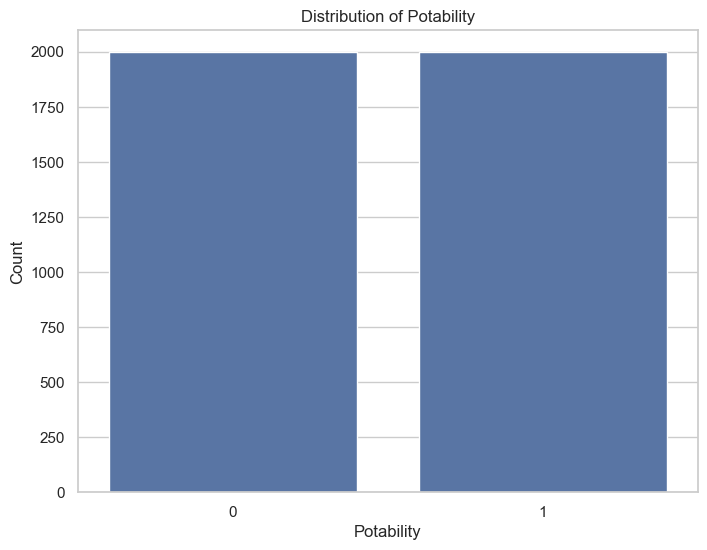

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribution of Potability')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

# Q- is the distribution the proportion and Potability and non-Potability?

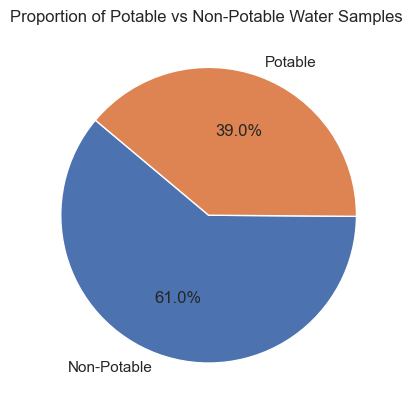

In [28]:
potability_counts = df['Potability'].value_counts()
labels = ['Non-Potable', 'Potable']
plt.pie(potability_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Potable vs Non-Potable Water Samples ')
plt.show()

***we compare the proportion and Potability in non-Potability, and we found that the concentration of the non potable water is more than the potable water***

<Axes: >

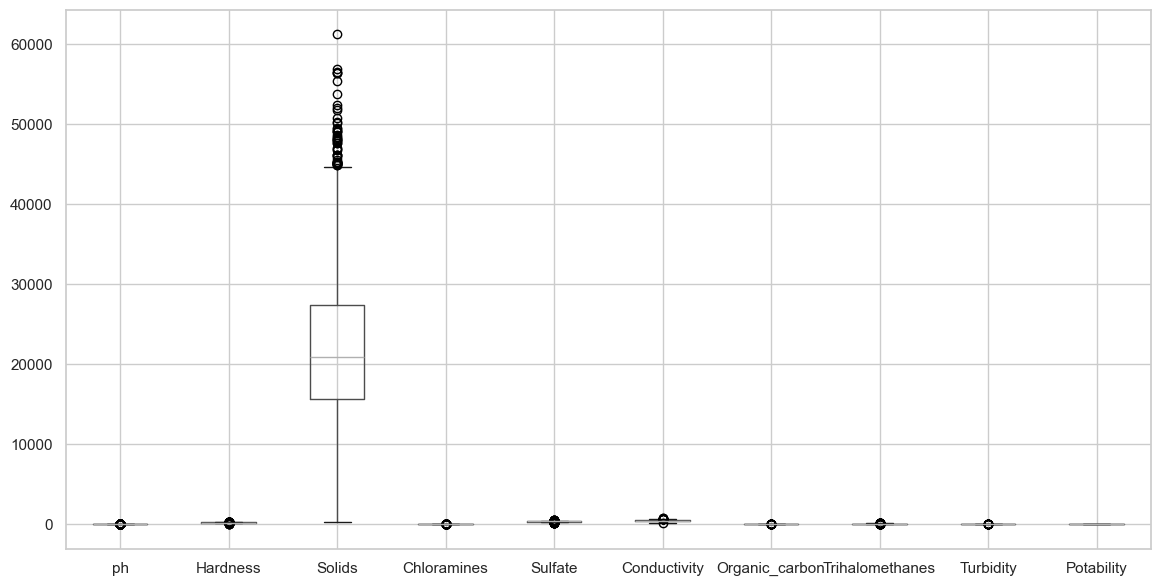

In [29]:
df.boxplot(figsize=(14,7))

## Extracting the features and splitting the dataset


In [30]:
x = df.drop('Potability',axis=1)
y = df['Potability']

In [57]:
# splitting the dataset to train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=0)

In [58]:
# Normalize the feature data
from sklearn.preprocessing import MinMaxScaler

# Normalize the feature data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### LogisticRegression model

In [59]:
model1 = LogisticRegression ()
model1.fit(X_train_normalized, y_train)

LogisticRegression()

In [60]:
predict_LR = model1.predict(X_test_normalized)

In [61]:
accuracy_score(predict_LR, y_test)

0.51375

In [62]:
report = classification_report(y_test, predict_LR)
print("LogisticRegression Classifier Report:")
print(report)

LogisticRegression Classifier Report:
              precision    recall  f1-score   support

           0       0.54      0.44      0.49       418
           1       0.49      0.59      0.54       382

    accuracy                           0.51       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.52      0.51      0.51       800



<Axes: >

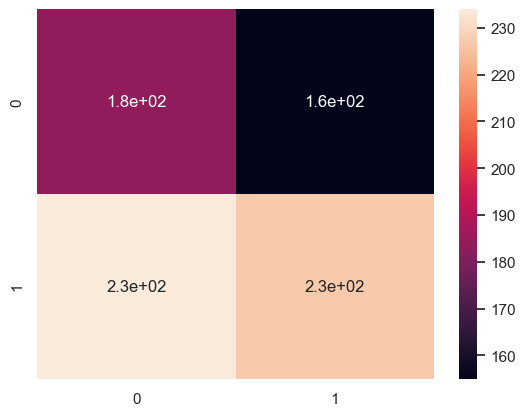

In [63]:
confusion_matrix(predict_LR, y_test)
sns.heatmap(confusion_matrix(predict_LR, y_test), annot=True)

### SVM model

In [64]:
model2 = SVC ()
model2.fit(X_train_normalized, y_train)

SVC()

In [65]:
predict_svm = model2.predict(X_test_normalized)

In [66]:
accuracy = accuracy_score(y_test, predict_svm)
print("Accuracy:", accuracy)

Accuracy: 0.68125


In [67]:
report = classification_report(y_test, predict_svm)
print("SVC Classifier Report:")
print(report)

SVC Classifier Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       418
           1       0.65      0.73      0.68       382

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.69      0.68      0.68       800



<Axes: >

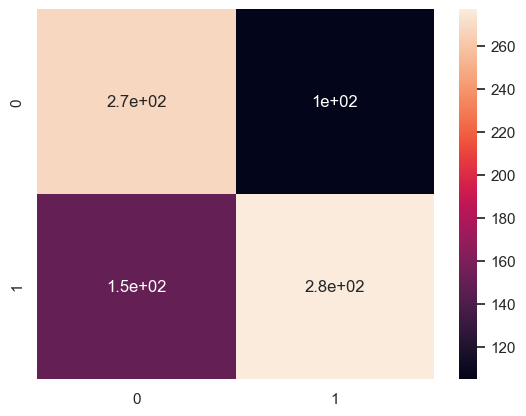

In [68]:
confusion_matrix(predict_svm, y_test)
sns.heatmap(confusion_matrix(predict_svm, y_test), annot=True)

### DecisionTreeClassifier model

In [69]:
model3 = DecisionTreeClassifier ()
model3.fit(X_train_normalized, y_train)

DecisionTreeClassifier()

In [70]:
predict_DT = model3.predict(X_test_normalized)

In [71]:
accuracy_score(predict_DT, y_test)

0.6075

In [72]:
report = classification_report(y_test, predict_DT)
print("DecisionTreeClassifier Classifier Report:")
print(report)

DecisionTreeClassifier Classifier Report:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       418
           1       0.58      0.68      0.62       382

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.61      0.61      0.61       800



<Axes: >

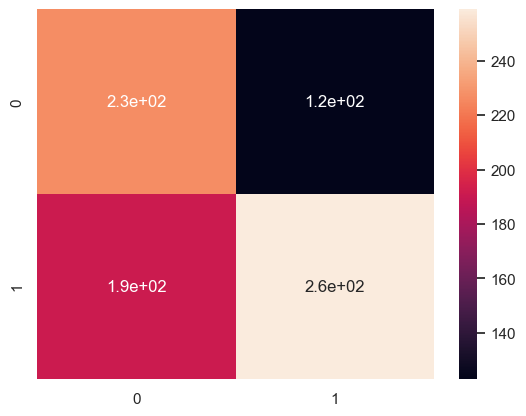

In [73]:
confusion_matrix(predict_DT, y_test)
sns.heatmap(confusion_matrix(predict_DT, y_test), annot=True)

### RandomForestClassifier model

In [74]:
model4 = RandomForestClassifier()

In [75]:
model4.fit(X_train_normalized, y_train)

RandomForestClassifier()

In [76]:
predict_RF = model4.predict(X_test_normalized)

In [77]:
accuracy_score(predict_RF, y_test)

0.73

<Axes: >

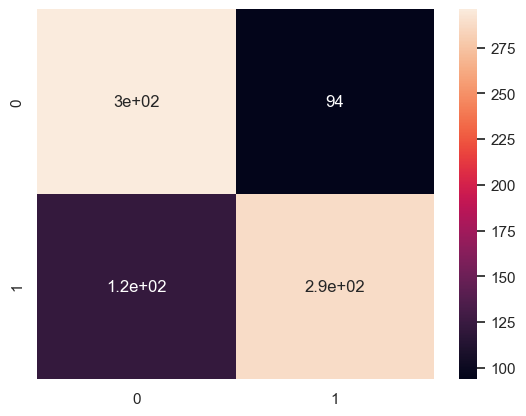

In [78]:
confusion_matrix(predict_RF, y_test)
sns.heatmap(confusion_matrix(predict_RF, y_test), annot=True)

In [79]:
report = classification_report(y_test, predict_RF)
print("RandomForestClassifier Classifier Report:")
print(report)

RandomForestClassifier Classifier Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       418
           1       0.70      0.75      0.73       382

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



In [91]:
import pickle
import streamlit as st

# فتح الملف المحفوظ
with open('RandomForestClassifier_model1.sav', 'rb') as file:
    model = pickle.load(file)

filename = 'Water_quality_prediction.sav'
pickle.dump(model, open(filename, 'wb'))

# تحميل الملف في تطبيق Streamlit
loaded_model = pickle.load(open(filename, 'rb'))
